# Question 1

In [1]:
using LinearAlgebra
using Plots

In [2]:
A = [-2 2 8; 2 7 10; 8 10 4]
A

3×3 Array{Int64,2}:
 -2   2   8
  2   7  10
  8  10   4

## Method 1

In [3]:
l(a, b, c) = [1 0 0; a 1 0; b c 1]
d(a, b, c) = [a 0 0; 0 b 0; 0 0 c]

d (generic function with 1 method)

In [4]:
L = l(-1, -4, 2)
D = d(-2/9, 1, 0)
L * D * L' 

3×3 Array{Float64,2}:
 -0.222222  0.222222  0.888889
  0.222222  0.777778  1.11111 
  0.888889  1.11111   0.444444

In [5]:
A/9

3×3 Array{Float64,2}:
 -0.222222  0.222222  0.888889
  0.222222  0.777778  1.11111 
  0.888889  1.11111   0.444444

## Method 2
Use $LU$ Decomposition to construct $LDU$ decomposition

In [6]:
E1 = [-9/2 0 0; 1 1 0; 4 0 1]
1/9*E1*A

3×3 Array{Float64,2}:
 1.0  -1.0  -4.0
 0.0   1.0   2.0
 0.0   2.0   4.0

In [7]:
E2 = [1 0 0; 0 1 0; 0 -2 1]
U = E2*E1*A
U /= 9

3×3 Array{Float64,2}:
 1.0  -1.0  -4.0
 0.0   1.0   2.0
 0.0   0.0   0.0

In [8]:
inv(E2*E1)

3×3 Array{Float64,2}:
 -0.222222  0.0  0.0
  0.222222  1.0  0.0
  0.888889  2.0  1.0

$L=(E2\times E1)^-1$  
Then we need to extract the first diagonal of $L$ into a diagonal matrix

In [9]:
L0 = [-2/9  0.0  0.0;
  2/9  1.0  0.0;
  8/9  2.0  1.0]

3×3 Array{Float64,2}:
 -0.222222  0.0  0.0
  0.222222  1.0  0.0
  0.888889  2.0  1.0

Now we need to extract the $-\frac{2}{9}$ term to $D$, which will multiply the first column with $-\frac{2}{9}$ when $L\times D$ is applied

In [10]:
L = [1  0.0  0.0;
  -1  1.0  0.0;
  -4  2.0  1.0]

3×3 Array{Float64,2}:
  1.0  0.0  0.0
 -1.0  1.0  0.0
 -4.0  2.0  1.0

In [11]:
D = [-2/9 0 0;
  0  1  0;
  0 0  0]

3×3 Array{Float64,2}:
 -0.222222  0.0  0.0
  0.0       1.0  0.0
  0.0       0.0  0.0

In [12]:
L * D * L' 

3×3 Array{Float64,2}:
 -0.222222  0.222222  0.888889
  0.222222  0.777778  1.11111 
  0.888889  1.11111   0.444444

In [13]:
A/9

3×3 Array{Float64,2}:
 -0.222222  0.222222  0.888889
  0.222222  0.777778  1.11111 
  0.888889  1.11111   0.444444

## inertia

In [14]:
eig = eigvals(A/9)

3-element Array{Float64,1}:
 -1.0000000000000004   
 -4.764101178639501e-17
  1.9999999999999998   

In [15]:
E = eigvecs(A/9)

3×3 Array{Float64,2}:
 -0.666667   0.666667  -0.333333
 -0.333333  -0.666667  -0.666667
  0.666667   0.333333  -0.666667

In [62]:
e3 = E[:, 3]

3-element Array{Float64,1}:
 -0.33333333333333326
 -0.6666666666666664 
 -0.6666666666666669 

In [63]:
eig[3]*e3

3-element Array{Float64,1}:
 -0.6666666666666664
 -1.3333333333333326
 -1.3333333333333335

In [64]:
1/9*A*e3

3-element Array{Float64,1}:
 -0.6666666666666667
 -1.3333333333333335
 -1.333333333333333 

#  Question 2
## Finding Cholesky Factorization of a Matrix

In [168]:
function cholesky_factorization(A)
    n = size(A)[1]
    α = sqrt(Complex(A[1]))
    if n == 1
        return α
    end
    v = A[2:n, 1]/α
    return [α (zeros(n-1)+im*zeros(n-1))'; v cholesky_factorization(A[2:n, 2:n] - v*v')]
end

cholesky_factorization (generic function with 1 method)

In [146]:
n = 3
CL_real = [2 0 0 ; 1 3 0; 2 1 3]
C_real = CL_real * CL_real'
eigvals(C_real)

3-element Array{Float64,1}:
  2.586414898264002
  6.690759634051093
 18.722825467684906

In [172]:
cholesky_factorization(C_real) == CL_real

true

In [139]:
n = 3
CL = [2 0 0; 1+.5im 3 0; 2+im 1-4im 3]
C = CL * CL'
eigvals(C)

3-element Array{Float64,1}:
  1.4818827284435265
  5.751134554403829 
 38.01698271715264  

Check if the factorization method is correct

In [170]:
cholesky_factorization(C)

3×3 Array{Complex{Float64},2}:
 2.0+0.0im  0.0-0.0im  0.0-0.0im
 1.0+0.5im  3.0+0.0im  0.0-0.0im
 2.0+1.0im  1.0-4.0im  3.0+0.0im

In [171]:
cholesky_factorization(C) == CL

3×3 BitArray{2}:
 1  1  1
 1  1  1
 1  1  1

In [173]:
# built-in cholesky
cholesky(C)

Cholesky{Complex{Float64},Array{Complex{Float64},2}}
U factor:
3×3 UpperTriangular{Complex{Float64},Array{Complex{Float64},2}}:
 2.0+0.0im  1.0-0.5im  2.0-1.0im
     ⋅      3.0+0.0im  1.0+4.0im
     ⋅          ⋅      3.0+0.0im

# Question 3

In [228]:
function generate_rand_vec(N, R)
    V = randn(3, N)
    R_L = cholesky_factorization(R)
    vectors = zeros(3, N) + zeros(3, N) * im
    for i in 1:N
        y_i = R_L * (V[:, i])
        # since mean is zero, we don't need to define x_i = y_i + m_x
        vectors[:, i] = y_i
    end
    return vectors
end

generate_rand_vec (generic function with 1 method)

In [231]:
R = [28 15+9im 2+21im; 15-9im 48 15-11im; 2-21im 15+11im 30]

3×3 Array{Complex{Int64},2}:
 28+0im   15+9im    2+21im
 15-9im   48+0im   15-11im
  2-21im  15+11im  30+0im 

In [232]:
N = 100000
vectors = generate_rand_vec(N, R)

3×100000 Array{Complex{Float64},2}:
 5.89581+0.0im       -3.40973+0.0im       …   -7.7226+0.0im    
 5.64755-1.89508im   -5.08827+1.09598im      0.309757+2.48226im
 1.54956-2.97109im  -0.485671+0.656249im     0.173862+8.38381im

In [233]:
r = zeros(3, 3) + im*zeros(3, 3)
for j in 1:N
    v = vectors[:, j]
    r += v*v'
end
R_hat = r/N
R_hat    

3×3 Array{Complex{Float64},2}:
 28.0487+0.0im      15.0907+9.01565im  2.01648+20.9989im
 15.0907-9.01565im   48.317+0.0im       15.064-11.0908im
 2.01648-20.9989im   15.064+11.0908im  30.0612+0.0im    

- It seems like it is not likely to find $\hat{R}$ without using for loops 
- $\hat{R}$ is close to $R$.
- My random generator seems to be working fine.

# Question 5

In [39]:
f(x, y) = (4*x^2-1)*exp(-x^2-y^2)
f(x) = f(x[1], x[2])

ex(x_1, x_2) = exp(-x_1^2-x_2^2)
ex(x) = ex(x[1], x[2])

∇f(x_1, x_2) = [(10*x_1-8x_1^2)*ex(x_1,x_2); -2*x_2*ex(x_1, x_2)]
∇f(x) = ∇f(x[1], x[2])

H(x_1, x_2) = ex(x_1, x_2)*
    [(-32*x_1^2 + 4*(4 *x_1^2 - 1)*x_1^2 + 8 - 2 *(4* x_1^2 - 1))  (4 * x_1 * (4 * x_1^2 - 1) * x_2 - 16 *x_1 *x_2); 
        (4 * x_1 * (4 * x_1^2 - 1)*x_2 - 16  *x_1 *x_2) (4 *(4* x_1^2 - 1) *x_2^2 - 2 *(4* x_1^2 - 1))]
H(x) = H(x[1], x[2])

f_q(x0, x) = f(x) + dot(∇f(x0), (x-x0)) + 0.5*dot(H(x0)*(x-x0), (x-x0))
f_q(x) = f_q([0; 0], x)
fq(x_1, x_2) = f_q([x_1; x_2])

fq (generic function with 1 method)

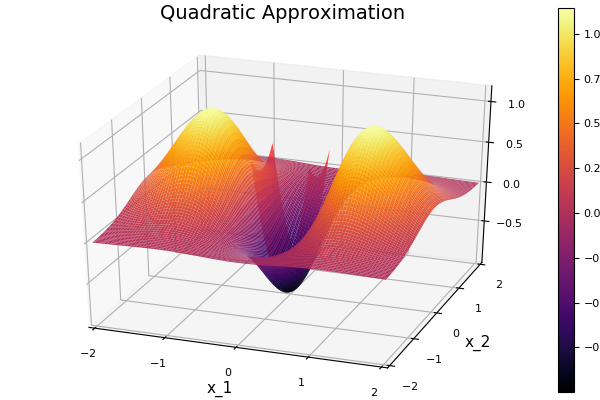

In [45]:
camera = (20, 30)
pyplot()
x_1 = range(-2, stop=2, length=100)
x_2 = range(-2, stop=2, length=100)
p = plot(x_1, x_2, f, title="Quadratic Approximation",
        st =:surface, camera=camera, xlabel="x_1", ylabel="x_2")

xq_1 = range(-.4, stop=.4, length=100)
xq_2 = range(-.4, stop=.4, length=100)
plot!(p, xq_1, xq_2, fq, st =:surface, camera=camera, color=:red)


## Question 5.c
1. Find an appropriate point.
2. Plot it

In [44]:
for i in x_1
    for j in x_2
        hess = H(i, j)
        if all(x -> x< 0, eigvals(hess)) && ∇f(i, j) != 0  
            println(i, j)
            break 
        end
    end
end

-1.5555555555555556-0.2222222222222222
-1.5151515151515151-0.3434343434343434
-1.4747474747474747-0.42424242424242425
-1.4343434343434343-0.5050505050505051
-1.393939393939394-0.5454545454545454
-1.3535353535353536-0.5858585858585859
-1.3131313131313131-0.6262626262626263
-1.2727272727272727-0.6262626262626263
-1.2323232323232323-0.6666666666666666
-1.1919191919191918-0.6666666666666666
-1.1515151515151516-0.6666666666666666
-1.1111111111111112-0.6666666666666666
-1.0707070707070707-0.6666666666666666
-1.0303030303030303-0.6666666666666666
-0.98989898989899-0.6666666666666666
-0.9494949494949495-0.6262626262626263
-0.9090909090909091-0.6262626262626263
-0.8686868686868687-0.5858585858585859
-0.8282828282828283-0.5454545454545454
-0.7878787878787878-0.5050505050505051
-0.7474747474747475-0.42424242424242425
-0.7070707070707071-0.3838383838383838
-0.6666666666666666-0.30303030303030304
-0.6262626262626263-0.2222222222222222
-0.5858585858585859-0.1414141414141414
-0.5454545454545454-0.060

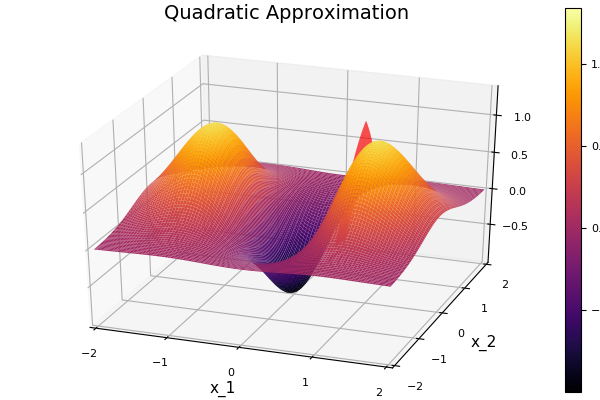

In [43]:
x0_approximation = [.7; .4]
fq_negative(x_1, x_2) = f_q(x0_approximation, [x_1; x_2])
camera = (20, 30)
pyplot()
x_1 = range(-2, stop=2, length=100)
x_2 = range(-2, stop=2, length=100)
p = plot(x_1, x_2, f, title="Quadratic Approximation",
        st =:surface, camera=camera, xlabel="x_1", ylabel="x_2")

xq_1 = range(x0_approximation[1]-.2, stop=x0_approximation[1]+.2, length=100)
xq_2 = range(x0_approximation[2]-.2, stop=x0_approximation[2]+.2, length=100)
plot!(p, xq_1, xq_2, fq_negative, st =:surface, camera=camera, color=:red)
